# Segment and Convert  biosignals
Segment : cut the different acquisitions recorded in the same file (multi-run recordings).

Convert : change the file type (from `.acq` to `.tsv.gz`).


#### Dependencies

In [1]:
import pandas as pd
import numpy as np
import os

In [4]:
import neurokit2 as nk2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%pylab inline
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = (12.0, 6.0)  
plt.rcParams.update({'font.size': 14})

Populating the interactive namespace from numpy and matplotlib


#### import some code

In [4]:
%run /home/francois.lespinasse/cneuromod/ds_prep/physio/draft/conversion/convert_seg2hdf.py

In [9]:
ls = list_sub('/data/neuromod/DATA/cneuromod/movie10/sourcedata/physio', sub='sub-03', show=True)

list of files for session ses-004: ['sub-03_ses-wolfofwallstreet2.acq']
list of files for session ses-010: ['neuromod_video52019-06-04T14_32_53.acq']
list of files for session ses-009: ['neuromod_video52019-05-31T08_55_13.acq']
list of files for session ses-003: ['sub-03_ses-wolfofwallstreet1.acq']
list of files for session ses-007: ['sub-03_ses-video5-006.acq']
list of files for session ses-013: ['neuromod_video52019-10-16T14_49_06.acq']
list of files for session ses-002: ['sub-03_ses-bournesup02.acq']
list of files for session ses-011: ['neuromod_video52019-06-07T13_18_27.acq']
list of files for session ses-005: ['sub-03_ses-wolfofwallstreet3.acq']
list of files for session ses-001: ['sub-03_ses-bournesup01.acq']
list of files for session ses-012: ['neuromod_video52019-09-03T15_07_02.acq', 'neuromod_video52019-09-03T16_21_27.acq']
list of files for session ses-006: ['Untitled1 (ecg_gsr_plet_ttl_respbelt).acq']


In [7]:
runs = volume_counter('/data/neuromod/DATA/cneuromod/movie10/sourcedata/physio/', subject='sub-01', ses='ses-009')

ses-009


In [8]:
runs

{'ses-009': [410, 410, 376, 410, 3, [410, 410, 3]]}

In [65]:
!phys2bids -h

Module `duecredit` not successfully imported due to "No module named 'duecredit'". Package functionality unaffected.
usage: phys2bids [-h] -in FILENAME [-info] [-indir INDIR] [-outdir OUTDIR]
                 [-heur HEUR_FILE] [-sub SUB] [-ses SES] [-chtrig CHTRIG]
                 [-chsel [CHSEL [CHSEL ...]]]
                 [-ntp [NUM_TIMEPOINTS_EXPECTED [NUM_TIMEPOINTS_EXPECTED ...]]]
                 [-tr [TR [TR ...]]] [-thr THR] [-pad PAD]
                 [-chnames [CH_NAME [CH_NAME ...]]] [-yml YML] [-debug]
                 [-quiet] [-v]

Required Argument::
  -in FILENAME, --input-file FILENAME
                        The name of the file containing physiological data,
                        with or without extension.

optional arguments:
  -h, --help            show this help message and exit
  -info, --info         Only output info about the file, don't process.
                        Default is to process.
  -indir INDIR, --input-dir INDIR
                        Folder

In [75]:
!phys2bids -in /data/neuromod/DATA/cneuromod/movie10/sourcedata/physio/sub-01/ses-003/sub-01_ses-wolfofwallstreet1.acq -sub 01 -ses 003, -tr 1.49 -thr 4 -chtrig 4 -ntp 9 406 406 406 406 3 406 406 -chname EDA PPG ECG TTL RSP

Module `duecredit` not successfully imported due to "No module named 'duecredit'". Package functionality unaffected.
INFO       Currently running phys2bids version 2.3.3
INFO       Input file is /data/neuromod/DATA/cneuromod/movie10/sourcedata/physio/sub-01/ses-003/sub-01_ses-wolfofwallstreet1.acq
INFO       File extension is .acq
WARNING    If both acq and txt files exist in the path, acq will be selected.
INFO       Reading the file /data/neuromod/DATA/cneuromod/movie10/sourcedata/physio/sub-01/ses-003/sub-01_ses-wolfofwallstreet1.acq
INFO       00. Channel GSR-EDA100C-MRI: 26764374 samples, 5000.0 samples/sec, loaded: True
INFO       01. Channel PPG100C: 26764374 samples, 5000.0 samples/sec, loaded: True
INFO       02. Channel ECG100C: 26764374 samples, 5000.0 samples/sec, loaded: True
INFO       03. Channel TTL: 26764374 samples, 5000.0 samples/sec, loaded: True
INFO       04. Channel Custom, HLT100C - A 6: 26764374 samples, 5000.0 samples/sec, loaded: True
INFO       Checking that

### homebrewed method

ses-001
sub-01_ses-001_task-run01 in file  sub-01_ses-bournesup01.acq in experiment: ses-001 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 5000.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-01_ses-001_task-run02 in file  sub-01_ses-bournesup01.acq in experiment: ses-001 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 5000.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-01_ses-001_task-run03 in file  sub-01_ses-bournesup01.acq in experiment: ses-001 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 5000.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-01_ses-001_task-run04 in file  sub-01_ses-bournesup01.acq in experiment: ses-001 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 5000.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-01_ses-001_task-run05 in file  sub-01_ses-bourne

/home/francois.lespinasse/anaconda3/envs/biosigEnv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


sub-01_ses-003_task-run07 in file  sub-01_ses-wolfofwallstreet1.acq in experiment: ses-003 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 5000.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ses-004
sub-01_ses-004_task-run01 in file  sub-01_ses-wolfofwallstreet2-3a.acq in experiment: ses-004 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 5000.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-01_ses-004_task-run02 in file  sub-01_ses-wolfofwallstreet2-3a.acq in experiment: ses-004 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 5000.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-01_ses-004_task-run03 in file  sub-01_ses-wolfofwallstreet2-3a.acq in experiment: ses-004 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 5000.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-01_ses-004_task

sub-01_ses-008_task-run07 in file  fast sampling rate data2019-05-03T15_41_57.acq in experiment: ses-008 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 10000.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ses-009
sub-01_ses-009_task-run01 in file  fast sampling rate data2019-05-10T10_22_08.acq in experiment: ses-009 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 10000.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-01_ses-009_task-run02 in file  fast sampling rate data2019-05-10T10_22_08.acq in experiment: ses-009 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 10000.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-01_ses-009_task-run03 in file  fast sampling rate data2019-05-10T10_22_08.acq in experiment: ses-009 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 10000.0

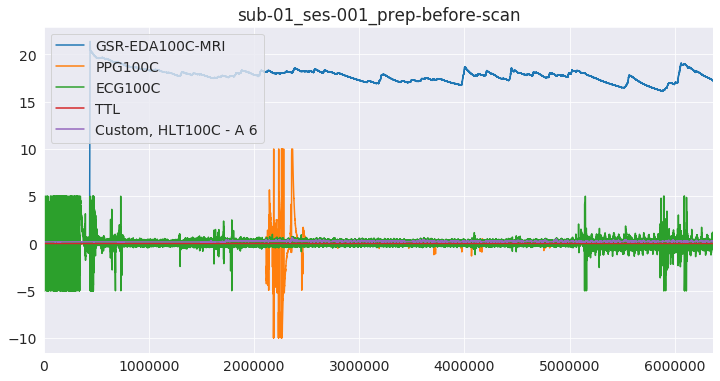

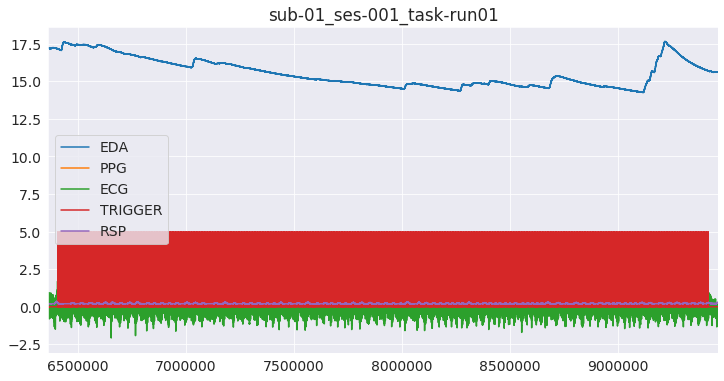

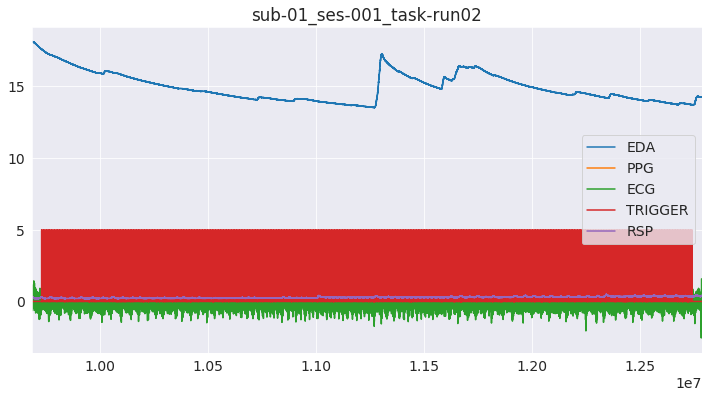

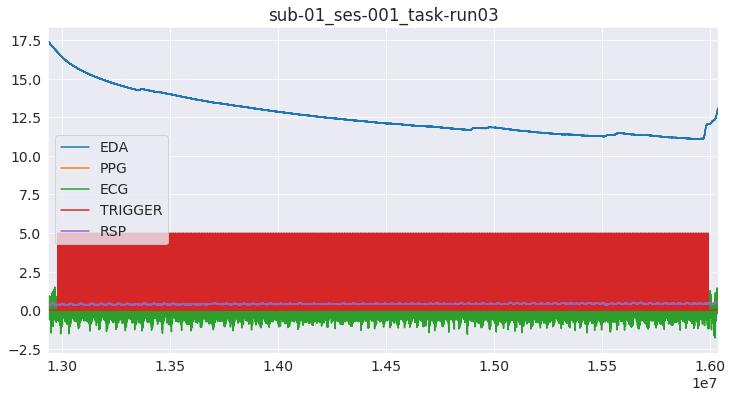

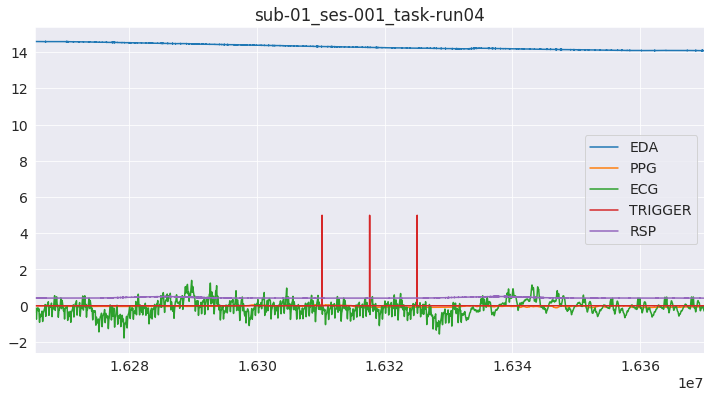

Error in callback <function flush_figures at 0x7fbb7ad18560> (for post_execute):


KeyboardInterrupt: 

In [15]:
for i in sessions:
    print(i)
    batch_parse(root='/data/neuromod/DATA/cneuromod/movie10/sourcedata/physio', subject='sub-01', ses=i, save_path='/home/francois.lespinasse/physiological-signals/tests/conversion/')